In [17]:
import pandas
titanic = pandas.read_csv('titanic_train.csv')
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [18]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [19]:
print(titanic['Sex'].unique())
titanic.loc[titanic['Sex'] == 'male','Sex'] = 0
titanic.loc[titanic['Sex'] == 'female','Sex'] = 1


['male' 'female']


In [20]:
print(titanic['Embarked'].unique())
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked'] == 'S','Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C','Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q','Embarked'] = 2
#print(titanic.head())

['S' 'C' 'Q' nan]


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
predictors = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

alg =  LinearRegression()

#使用Kfold将样本的训练集做一个3倍的交叉验证
kf = KFold(titanic.shape[0],n_folds = 3,random_state = 1)
#在每次交叉验证中建立回归模型
predictions = []
for train,test in kf:
    #取出训练集中的船员特征属性
    train_predictors = (titanic[predictors].iloc[train,:])
    #取出训练集中的是否获救的结果
    train_target = titanic['Survived'].iloc[train]
    #将线性回归应用到数据
    alg.fit(train_predictors,train_target)
    #运行测试结果
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    #将结果收集
    predictions.append(test_predictions)
    

In [22]:
import numpy as np
#调用数组操作函数
predictions = np.concatenate(predictions,axis=0)
#将输出的0到1区间内的结果以0.5作为分界点做二级分化

predictions[predictions > .5] = 1
predictions[predictions <= .5] = 0
#将预测输出的结果与训练集中的真实结果进行正确率比较
accuracy = sum(predictions ==titanic['Survived']) / len(predictions)
print(accuracy)


0.7833894500561167


In [23]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.7878787878787877


In [24]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
#导入特征集合
predictors = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
#创建随机森林 决策树数量 为10个，停止条件为最小树枝为2或最小叶子数为一
alg = RandomForestClassifier(random_state = 1,n_estimators = 10,min_samples_split = 2,min_samples_leaf = 1)
#再进行一次交叉检验
kf =cross_validation.KFold(titanic.shape[0],n_folds = 3,random_state = 1)
#进行模型评估 分类器为随机森林，数据为船员特征，目标为生存率，参数为交叉检验的结果
scores = cross_validation.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv = kf)

print(scores.mean())




0.7856341189674523


In [25]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
#导入特征集合
predictors = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
#创建随机森林 决策树数量 为50个，停止条件为最小树枝为4或最小叶子数为2
alg = RandomForestClassifier(random_state = 1,n_estimators = 50,min_samples_split = 4,min_samples_leaf = 2)
#再进行一次交叉检验
kf =cross_validation.KFold(titanic.shape[0],n_folds = 3,random_state = 1)
#进行模型评估 分类器为随机森林，数据为船员特征，目标为生存率，参数为交叉检验的结果
scores = cross_validation.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv = kf)

print(scores.mean())

0.8159371492704826


In [26]:
#统计家庭规模为长辈与兄弟的总和
titanic["FamilySize"] = titanic['SibSp'] + titanic['Parch']
#统计船员名字字母总长度

titanic['NameLength'] = titanic['Name'].apply(lambda x : len(x))


In [27]:
import re
#使用正则表达 截取人名中的身份称呼
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ''
#以身份称呼为分类 统计船员个数
titles = titanic['Name'].apply(get_title)
print(pandas.value_counts(titles))
#将身份称呼进行 数字编码

title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Dr":5,"Rev":6,"Major":7,"Col":7,"Mlle":8,"Mme":8,"Don":9,"Lady":10,"Countess":10,"Jonkheer":10,"Str":9,"Capt":7,"Ms":2,"Sir":9}


for k,v in title_mapping.items():
     titles[titles==k]=v

print(pandas.value_counts(titles))
 
#将转化好的特征新增到数据集名称Title中

titanic['Title'] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Don           1
Ms            1
Sir           1
Jonkheer      1
Lady          1
Capt          1
Mme           1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


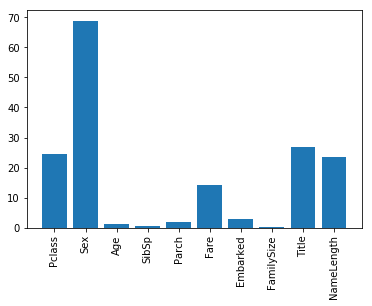

0.819304152637486


In [28]:
#导入特征选择模块
import numpy as np
from sklearn import cross_validation
from sklearn.feature_selection import SelectKBest,f_classif
import matplotlib.pyplot as plt
predictors = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","FamilySize","Title","NameLength"]
 
#通过加入噪音值观察
selector = SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic["Survived"])
 

scores=-np.log10(selector.pvalues_)
 
#输出柱状图
plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation='vertical')
plt.show()
 
#选取影响最大的特征作为新的特征集
predictors = ["Pclass","Sex","Fare","Title"]
 

alg = RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=8,min_samples_leaf=4)
scores = cross_validation.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv = kf)
print(scores.mean())


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title",]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

# Initialize the cross validation folds
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)




0.27946127946127947
